In [1]:
import os
import json
import pandas as pd
import seaborn as sns
from datetime import datetime
import numpy as np
import matplotlib.pylab as plt
from Useful_Functions import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Question 1. Does politics/election results affect SBA loan approval Percentage?

Step 1. Import Dataset

In [2]:
df_raw = pd.read_csv('SBAnational.csv')
df_raw.info()
df_raw

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899164 entries, 0 to 899163
Data columns (total 27 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   LoanNr_ChkDgt      899164 non-null  int64  
 1   Name               899150 non-null  object 
 2   City               899134 non-null  object 
 3   State              899150 non-null  object 
 4   Zip                899164 non-null  int64  
 5   Bank               897605 non-null  object 
 6   BankState          897598 non-null  object 
 7   NAICS              899164 non-null  int64  
 8   ApprovalDate       899164 non-null  object 
 9   ApprovalFY         899164 non-null  object 
 10  Term               899164 non-null  int64  
 11  NoEmp              899164 non-null  int64  
 12  NewExist           899028 non-null  float64
 13  CreateJob          899164 non-null  int64  
 14  RetainedJob        899164 non-null  int64  
 15  FranchiseCode      899164 non-null  int64  
 16  Ur

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899159,9995573004,FABRIC FARMS,UPPER ARLINGTON,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451120,27-Feb-97,1997,...,0,N,NaN,30-Sep-97,"$70,000.00",$0.00,P I F,$0.00,"$70,000.00","$56,000.00"
899160,9995603000,FABRIC FARMS,COLUMBUS,OH,43221,JPMORGAN CHASE BANK NATL ASSOC,IL,451130,27-Feb-97,1997,...,Y,N,NaN,31-Oct-97,"$85,000.00",$0.00,P I F,$0.00,"$85,000.00","$42,500.00"
899161,9995613003,"RADCO MANUFACTURING CO.,INC.",SANTA MARIA,CA,93455,"RABOBANK, NATIONAL ASSOCIATION",CA,332321,27-Feb-97,1997,...,N,N,NaN,30-Sep-97,"$300,000.00",$0.00,P I F,$0.00,"$300,000.00","$225,000.00"
899162,9995973006,"MARUTAMA HAWAII, INC.",HONOLULU,HI,96830,BANK OF HAWAII,HI,0,27-Feb-97,1997,...,N,Y,8-Mar-00,31-Mar-97,"$75,000.00",$0.00,CHGOFF,"$46,383.00","$75,000.00","$60,000.00"


In [3]:
df = pd.read_csv('SBAnational_with_industry_added.csv')
df

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry
0,0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,...,N,Y,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00",Retail trade
1,1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,...,N,Y,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00",Accommodation and food services
2,2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,...,N,N,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00",Health care and social assistance
3,5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,...,N,N,30-Jun-97,"$517,000.00",$0.00,P I F,$0.00,"$517,000.00","$387,750.00",Manufacturing
4,7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,...,N,Y,30-Jun-98,"$45,000.00",$0.00,P I F,$0.00,"$45,000.00","$36,000.00",Other services (except public administration)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794092,885624,9702953008,ROCKY MOUNTAIN COMPUTERS,COMMERCE CITY,CO,80002,BANK OF THE WEST,CO,0,28-Oct-96,...,N,N,31-May-98,"$30,000.00",$0.00,P I F,$0.00,"$30,000.00","$24,000.00",Retail trade
794093,885643,9704023004,"THE DUVALL INN, INC.",LEWISTOWN,MT,59457,WELLS FARGO BANK NATL ASSOC,SD,0,28-Oct-96,...,N,N,27-Dec-98,"$267,000.00",$0.00,P I F,$0.00,"$267,000.00","$200,250.00",Accommodation and food services
794094,886451,9721213004,MISTER BAGEL OF CAPE COD,HYANNIS,MA,2601,BANK OF AMERICA NATL ASSOC,RI,0,1-Nov-96,...,N,N,31-Jan-97,"$228,571.00",$0.00,CHGOFF,"$176,095.00","$250,000.00","$187,500.00",Accommodation and food services
794095,890560,9817643009,REPOSE MASSAGE THERAPY,BOSTON,MA,2109,CAMBRIDGE TRUST COMPANY,MA,0,6-Dec-96,...,N,N,31-Mar-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00",Health care and social assistance


Step 2. Overview of the dataset

In [4]:
#create a barplot of missing values
missing_values = df_raw.isnull().sum() / len(df_raw)
missing_values['NAICS'] = (df_raw['NAICS'] == 0).sum()/len(df_raw)
missing_values['UrbanRural'] = (df_raw['UrbanRural'] == 0).sum()/len(df_raw)
missing_values.sort_values(inplace=True)

missing_values = missing_values.to_frame()
missing_values.columns = ['count']
missing_values.index.names = ['Name']
missing_values['Name'] = missing_values.index
missing_values['count'] = missing_values['count'] * 100

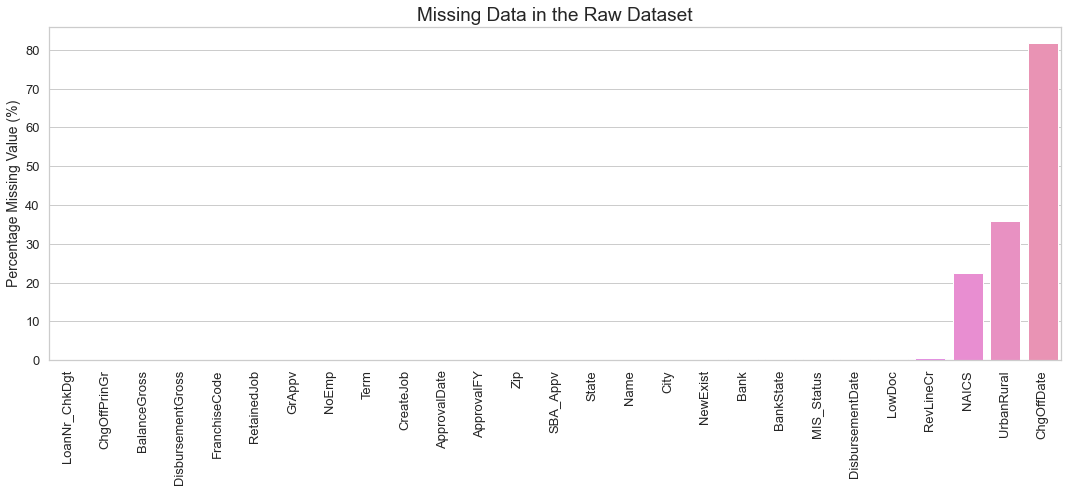

In [5]:
plt.figure(figsize=(15,7))
sns.set(style="whitegrid", color_codes=True)
ax1 = sns.barplot(x = 'Name', y = 'count', data=missing_values)
plt.xticks(rotation = 90,fontsize = 13)
plt.yticks(fontsize = 13)
plt.title('Missing Data in the Raw Dataset',fontsize = 19)
ax1.set_ylabel('Percentage Missing Value (%)',fontsize=14)
ax1.set_xlabel('',fontsize=0)
plt.tight_layout()
plt.savefig('Mising Data in the Raw Dataset')
plt.show()

In [6]:
print(df.info())
print(df['Industry'].isna().sum()/df.shape[0])   #all of them have an industry, so cleaning worked
#print(df['Industry'].value_counts())
print(df['State'].isna().sum()/df.shape[0]) # every row has state info



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794097 entries, 0 to 794096
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         794097 non-null  int64  
 1   LoanNr_ChkDgt      794097 non-null  int64  
 2   Name               794086 non-null  object 
 3   City               794086 non-null  object 
 4   State              794088 non-null  object 
 5   Zip                794097 non-null  int64  
 6   Bank               793049 non-null  object 
 7   BankState          793043 non-null  object 
 8   NAICS              794097 non-null  int64  
 9   ApprovalDate       794097 non-null  object 
 10  ApprovalFY         794097 non-null  object 
 11  Term               794097 non-null  int64  
 12  NoEmp              794097 non-null  int64  
 13  NewExist           793961 non-null  float64
 14  CreateJob          794097 non-null  int64  
 15  RetainedJob        794097 non-null  int64  
 16  Fr

Step 3. Data cleaning, remove or fill missing info

In [7]:
df = df[df['State'].notna()]
df = df[df['Name'].notna()]
df['Name'] = df['Name'].astype(str)

#Fill MIS column
for x in df[df['MIS_Status'].isnull()]['ChgOffPrinGr'].index:
    if df['ChgOffPrinGr'][x] == 0:
        df.loc[x,'MIS_Status'] = "P I F"
    else:
        df.loc[x,'MIS_Status'] = "CHGOFF"

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 794077 entries, 0 to 794096
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         794077 non-null  int64  
 1   LoanNr_ChkDgt      794077 non-null  int64  
 2   Name               794077 non-null  object 
 3   City               794066 non-null  object 
 4   State              794077 non-null  object 
 5   Zip                794077 non-null  int64  
 6   Bank               793029 non-null  object 
 7   BankState          793023 non-null  object 
 8   NAICS              794077 non-null  int64  
 9   ApprovalDate       794077 non-null  object 
 10  ApprovalFY         794077 non-null  object 
 11  Term               794077 non-null  int64  
 12  NoEmp              794077 non-null  int64  
 13  NewExist           793941 non-null  float64
 14  CreateJob          794077 non-null  int64  
 15  RetainedJob        794077 non-null  int64  
 16  Fr

In [8]:
#Drop dollar sign in some columns and convert them to float
df['DisbursementGross'] = df['DisbursementGross'].apply(clean_currency).astype('float')
df['ChgOffPrinGr'] = df['ChgOffPrinGr'].apply(clean_currency).astype('float')
df['GrAppv'] = df['GrAppv'].apply(clean_currency).astype('float')
df['SBA_Appv'] = df['SBA_Appv'].apply(clean_currency).astype('float')
df['BalanceGross'] = df['BalanceGross'].apply(clean_currency).astype('float')
df

,Unnamed: 0,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry
0,0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,...,N,Y,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0,Retail trade
1,1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,...,N,Y,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0,Accommodation and food services
2,2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,...,N,N,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0,Health care and social assistance
3,5,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,28-Feb-97,...,N,N,30-Jun-97,517000.0,0.0,P I F,0.0,517000.0,387750.0,Manufacturing
4,7,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,28-Feb-97,...,N,Y,30-Jun-98,45000.0,0.0,P I F,0.0,45000.0,36000.0,Other services (except public administration)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794092,885624,9702953008,ROCKY MOUNTAIN COMPUTERS,COMMERCE CITY,CO,80002,BANK OF THE WEST,CO,0,28-Oct-96,...,N,N,31-May-98,30000.0,0.0,P I F,0.0,30000.0,24000.0,Retail trade
794093,885643,9704023004,"THE DUVALL INN, INC.",LEWISTOWN,MT,59457,WELLS FARGO BANK NATL ASSOC,SD,0,28-Oct-96,...,N,N,27-Dec-98,267000.0,0.0,P I F,0.0,267000.0,200250.0,Accommodation and food services
794094,886451,9721213004,MISTER BAGEL OF CAPE COD,HYANNIS,MA,2601,BANK OF AMERICA NATL ASSOC,RI,0,1-Nov-96,...,N,N,31-Jan-97,228571.0,0.0,CHGOFF,176095.0,250000.0,187500.0,Accommodation and food services
794095,890560,9817643009,REPOSE MASSAGE THERAPY,BOSTON,MA,2109,CAMBRIDGE TRUST COMPANY,MA,0,6-Dec-96,...,N,N,31-Mar-97,40000.0,0.0,P I F,0.0,40000.0,32000.0,Health care and social assistance


In [9]:
#ApprovalFY column has some weird entry that has alphabet, need to drop the alphabet
print(df['ApprovalFY'].unique())
df['ApprovalFY'] = df['ApprovalFY'].apply(lambda x: ''.join(filter(str.isdigit,str(x)))).apply(lambda x:int(x))
print(df['ApprovalFY'].unique())




[1997 2006 1998 1999 2001 2003 2004 1984 1987 2007 1988 2008 2000 1989
 2009 1990 1991 1992 2002 1993 1994 1995 2005 1996 2010 2011 2012 2013
 2014 1980 1972 1979 1981 1978 1962 1982 1983 1973 1985 1986 '1989' '1980'
 '1982' '1973' '2000' '1990' '1974' '1981' '2001' '1991' '1992' '1993'
 '1983' '1994' '1984' '1975' '1979' '1976' '1968' '1977' '1978' '1976A'
 '1995' '1970' '1996' '1971' '1997' '1999' '1998']
[1997 2006 1998 1999 2001 2003 2004 1984 1987 2007 1988 2008 2000 1989
 2009 1990 1991 1992 2002 1993 1994 1995 2005 1996 2010 2011 2012 2013
 2014 1980 1972 1979 1981 1978 1962 1982 1983 1973 1985 1986 1974 1975
 1976 1968 1977 1970 1971]


Step 4.Add federal election result (party in power) to each loan

In [10]:
#importing federal election result csv
federal_election_df = pd.read_csv('US_President.csv')


In [11]:
#need to use datetime for matching loan and federal party in power, create datetime objects
df['ApprovalDate'] = pd.to_datetime(df['ApprovalDate'], dayfirst=True, format='%d-%b-%y') #year data for some rows are off
print(df['ApprovalDate'].max())
df['ApprovalDate'] = fix_year(df['ApprovalDate'],df['ApprovalFY'])

federal_election_df['start date'] = pd.to_datetime(federal_election_df['From'])
federal_election_df['end date'] = pd.to_datetime(federal_election_df['To'],errors='coerce')  # the last end date is current, which is a string, replace it with NAT
federal_election_df['end date'] = federal_election_df['end date'].fillna(pd.to_datetime('2021-01-20'))  # Replace NAT with the googled last day of Trump's presidency term

2068-02-09 00:00:00


KeyError: 94

In [9]:
#merge two dataframe based on ApprovalDate from df, and start date and end date from federal_election_df, add a new column to pd that is federal party in power when the loan was approved, run time is long, need to save a checkpoint
df_with_party = merge_on_date(df, federal_election_df, 'President Party','Party')

KeyboardInterrupt: 

In [56]:
df_with_party

,Unnamed: 0,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,...,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv,Industry,President Party
0,0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,1997-02-28,...,NaN,28-Feb-99,60000.0,0.0,P I F,0.0,60000.0,48000.0,Retail trade,Democratic
1,1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,1997-02-28,...,NaN,31-May-97,40000.0,0.0,P I F,0.0,40000.0,32000.0,Accommodation and food services,Democratic
2,2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,1997-02-28,...,NaN,31-Dec-97,287000.0,0.0,P I F,0.0,287000.0,215250.0,Health care and social assistance,Democratic
3,3,1000084002,"B&T SCREW MACHINE COMPANY, INC",PLAINVILLE,CT,6062,"TD BANK, NATIONAL ASSOCIATION",DE,332721,1997-02-28,...,NaN,30-Jun-97,517000.0,0.0,P I F,0.0,517000.0,387750.0,Manufacturing,Democratic
4,4,1000094005,WEAVER PRODUCTS,SUMMERFIELD,FL,34491,REGIONS BANK,AL,811118,1997-02-28,...,NaN,30-Jun-98,45000.0,0.0,P I F,0.0,45000.0,36000.0,Other services (except public administration),Democratic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799541,899134,9995083010,RUSHING'S GROCERY,LAURINBURG,NC,28352,WELLS FARGO BANK NATL ASSOC,SD,0,1997-02-27,...,NaN,31-Mar-97,25455.0,0.0,P I F,0.0,20000.0,10000.0,Retail trade,Democratic
799542,899148,9995353008,FRANKIE'S CHICAGO STYLE PIZZA,MAPLE GROVE,MN,55369,WELLS FARGO BANK NATL ASSOC,SD,0,1997-02-27,...,NaN,31-Mar-97,100000.0,0.0,P I F,0.0,100000.0,80000.0,Accommodation and food services,Democratic
799543,899153,9995413002,NORTH SHORE FLORAL,WOODBURY,NY,11797,FLUSHING BANK,NY,0,1997-02-27,...,7-Jul-04,31-May-97,142000.0,0.0,CHGOFF,0.0,142000.0,106500.0,Retail trade,Democratic
799544,899158,9995563001,SHADES WINDOW TINTING AUTO ALA,IRVING,TX,75062,LOANS FROM OLD CLOSED LENDERS,DC,0,1997-02-27,...,NaN,30-Jun-97,79000.0,0.0,P I F,0.0,79000.0,63200.0,Other services (except public administration),Democratic


In [57]:
#Check point
df_with_party.to_csv('df_with_party.csv')


In [3]:
df_with_party = pd.read_csv('df_with_party.csv')

In [4]:
#Decide which features to include in the logistic regression model, first using logics, select the following features as a starting point
selected_features = ['State','Term','NoEmp','NewExist','CreateJob','RetainedJob','FranchiseCode','UrbanRural','RevLineCr','GrAppv','SBA_Appv','Industry','President Party','ApprovalFY']
new_df = df_with_party[selected_features]
new_df

,State,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,GrAppv,SBA_Appv,Industry,President Party,ApprovalFY
0,IN,84,4,2.0,0,0,1,0,N,60000.0,48000.0,Retail trade,Democratic,1997
1,IN,60,2,2.0,0,0,1,0,N,40000.0,32000.0,Accommodation and food services,Democratic,1997
2,IN,180,7,1.0,0,0,1,0,N,287000.0,215250.0,Health care and social assistance,Democratic,1997
3,CT,120,19,1.0,0,0,1,0,N,517000.0,387750.0,Manufacturing,Democratic,1997
4,FL,84,1,2.0,0,0,1,0,N,45000.0,36000.0,Other services (except public administration),Democratic,1997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799541,NC,60,4,1.0,0,0,1,0,T,20000.0,10000.0,Retail trade,Democratic,1997
799542,MN,120,25,1.0,0,0,1,0,0,100000.0,80000.0,Accommodation and food services,Democratic,1997
799543,NY,119,5,1.0,0,0,1,0,0,142000.0,106500.0,Retail trade,Democratic,1997
799544,TX,84,5,2.0,0,0,1,0,N,79000.0,63200.0,Other services (except public administration),Democratic,1997


In [5]:
new_df['SBA_backed_portion'] = new_df['SBA_Appv']/new_df['GrAppv']
new_df['Republican'] = [1 if x == 'Republican' else 0 for x in new_df['President Party']]
new_df

<ipython-input-5-8d716db1d2e8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['SBA_backed_portion'] = new_df['SBA_Appv']/new_df['GrAppv']
<ipython-input-5-8d716db1d2e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Republican'] = [1 if x == 'Republican' else 0 for x in new_df['President Party']]


,State,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,GrAppv,SBA_Appv,Industry,President Party,ApprovalFY,SBA_backed_portion,Republican
0,IN,84,4,2.0,0,0,1,0,N,60000.0,48000.0,Retail trade,Democratic,1997,0.80,0
1,IN,60,2,2.0,0,0,1,0,N,40000.0,32000.0,Accommodation and food services,Democratic,1997,0.80,0
2,IN,180,7,1.0,0,0,1,0,N,287000.0,215250.0,Health care and social assistance,Democratic,1997,0.75,0
3,CT,120,19,1.0,0,0,1,0,N,517000.0,387750.0,Manufacturing,Democratic,1997,0.75,0
4,FL,84,1,2.0,0,0,1,0,N,45000.0,36000.0,Other services (except public administration),Democratic,1997,0.80,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799541,NC,60,4,1.0,0,0,1,0,T,20000.0,10000.0,Retail trade,Democratic,1997,0.50,0
799542,MN,120,25,1.0,0,0,1,0,0,100000.0,80000.0,Accommodation and food services,Democratic,1997,0.80,0
799543,NY,119,5,1.0,0,0,1,0,0,142000.0,106500.0,Retail trade,Democratic,1997,0.75,0
799544,TX,84,5,2.0,0,0,1,0,N,79000.0,63200.0,Other services (except public administration),Democratic,1997,0.80,0


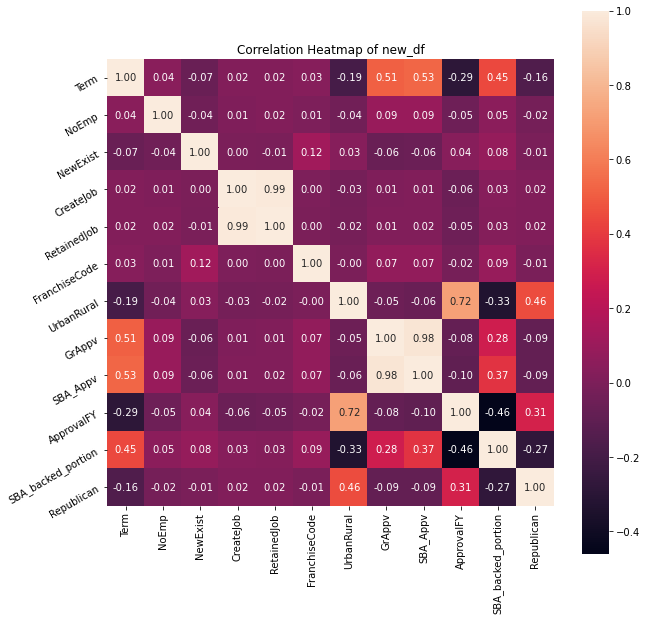

In [6]:
#correlation to see if there is pattern
correlation = new_df.corr()
plt.figure(figsize=(10,10))
plt.title('Correlation Heatmap of new_df')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels(), rotation=30)
plt.show()

In [7]:
#there seems to be some positive correlation between party in power and urbanrural feature, lets do some visualization
grouped_by_party_urbanrural = new_df.groupby(['President Party', 'UrbanRural']).agg({'SBA_backed_portion': ['mean', 'min', 'max','count']})
df_for_graph = grouped_by_party_urbanrural['SBA_backed_portion']
df_for_graph = df_for_graph.reset_index()
df_for_graph = df_for_graph[df_for_graph['UrbanRural'] != 0]
df_for_graph['UrbanRural'] = df_for_graph['UrbanRural'].apply(lambda x: 'Urban' if x == 1 else 'Rural')


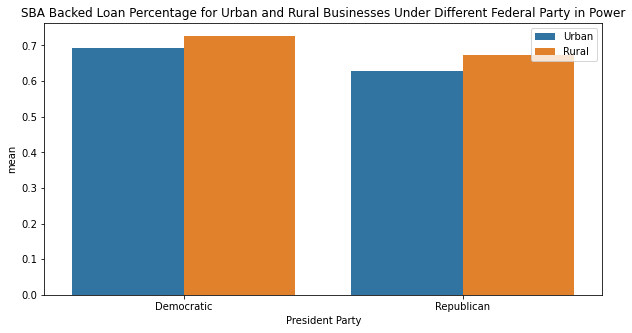

In [8]:
plt.figure(figsize=(10,5))
plt.title('SBA Backed Loan Percentage for Urban and Rural Businesses Under Different Federal Party in Power')
ax = sns.barplot(x = 'President Party',y = 'mean',data = df_for_graph, hue = 'UrbanRural')
ax.legend()
plt.show()

Not too much difference between urban and rural business for either democratic or republican. Analyze the trend by state. Choose Florida (swing state) and Texas (Republican since 70s)

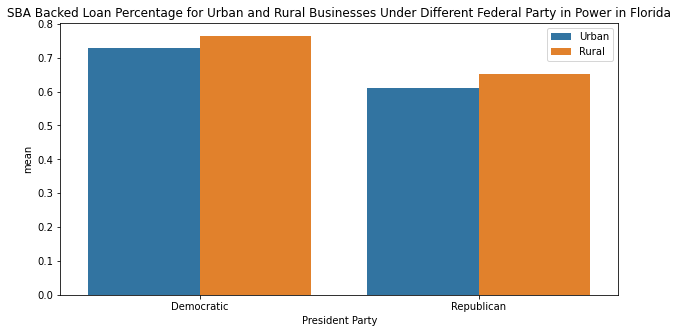

,President Party,UrbanRural,mean,min,max,count
1,Democratic,Urban,0.728472,0.31250,1.0,3202
2,Democratic,Rural,0.764455,0.30000,1.0,600
4,Republican,Urban,0.610334,0.27796,1.0,22789
5,Republican,Rural,0.651179,0.50000,1.0,3943


In [9]:
FL_df = new_df[new_df['State'] == 'FL']
grouped_by_party_urbanrural_FL = FL_df.groupby(['President Party', 'UrbanRural']).agg({'SBA_backed_portion': ['mean', 'min', 'max','count']})
df_for_graph_FL = grouped_by_party_urbanrural_FL['SBA_backed_portion']
df_for_graph_FL = df_for_graph_FL.reset_index()
df_for_graph_FL = df_for_graph_FL[df_for_graph_FL['UrbanRural'] != 0]
df_for_graph_FL['UrbanRural'] = df_for_graph_FL['UrbanRural'].apply(lambda x: 'Urban' if x == 1 else 'Rural')

plt.figure(figsize=(10,5))
plt.title('SBA Backed Loan Percentage for Urban and Rural Businesses Under Different Federal Party in Power in Florida')
ax = sns.barplot(x = 'President Party',y = 'mean',data = df_for_graph_FL, hue = 'UrbanRural')
ax.legend()
plt.show()
df_for_graph_FL

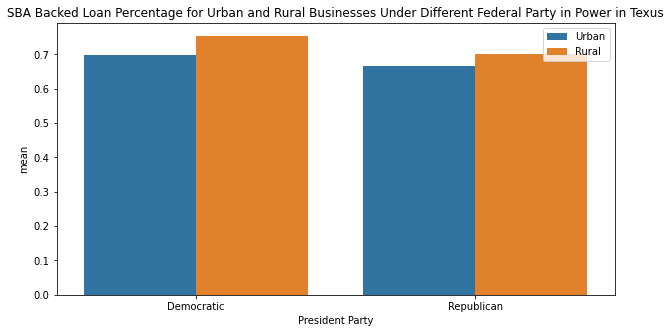

,President Party,UrbanRural,mean,min,max,count
1,Democratic,Urban,0.697408,0.195868,1.0,6611
2,Democratic,Rural,0.753973,0.449100,1.0,653
4,Republican,Urban,0.666287,0.110000,1.0,29793
5,Republican,Rural,0.700056,0.230000,1.0,3841


In [10]:
TX_df = new_df[new_df['State'] == 'TX']
grouped_by_party_urbanrural_TX = TX_df.groupby(['President Party', 'UrbanRural']).agg({'SBA_backed_portion': ['mean', 'min', 'max','count']})
df_for_graph_TX = grouped_by_party_urbanrural_TX['SBA_backed_portion']
df_for_graph_TX = df_for_graph_TX.reset_index()
df_for_graph_TX = df_for_graph_TX[df_for_graph_TX['UrbanRural'] != 0]
df_for_graph_TX['UrbanRural'] = df_for_graph_TX['UrbanRural'].apply(lambda x: 'Urban' if x == 1 else 'Rural')

plt.figure(figsize=(10,5))
plt.title('SBA Backed Loan Percentage for Urban and Rural Businesses Under Different Federal Party in Power in Texus')
ax = sns.barplot(x = 'President Party',y = 'mean',data = df_for_graph_TX, hue = 'UrbanRural')
ax.legend()
plt.show()
df_for_graph_TX

Analyze the total amount of SBA approved loan for different party

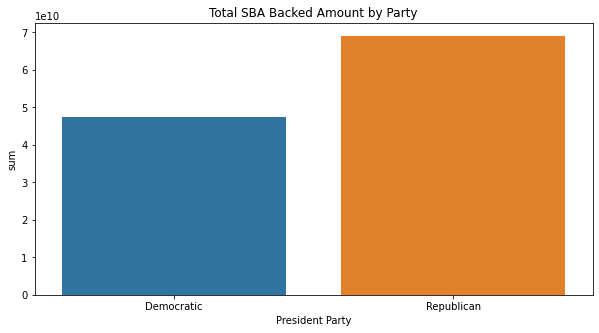

,President Party,mean,sum,count
0,Democratic,174937.227776,4.749616e+10,271504
1,Republican,130726.725749,6.902920e+10,528042


In [11]:
grouped_by_party_totalSBA = new_df.groupby(['President Party']).agg({'SBA_Appv': ['mean', 'sum','count']})
df_for_graph_totalSBA = grouped_by_party_totalSBA['SBA_Appv']
df_for_graph_totalSBA = df_for_graph_totalSBA.reset_index()

plt.figure(figsize=(10,5))
plt.title('Total SBA Backed Amount by Party')
ax = sns.barplot(x = 'President Party',y = 'sum',data = df_for_graph_totalSBA)
plt.show()
df_for_graph_totalSBA

Looks like republican have more funding for supporting small businesses, however, this is not normalized to year or accounting for inflation

Lastly, I want to analyze the industry receiving the most funding under each political party.

In [14]:
df_republican = new_df[new_df['President Party'] == 'Republican']
df_democratic = new_df[new_df['President Party'] == 'Democratic']

df_republican_by_Industry = df_republican.groupby('Industry').sum()['SBA_Appv']
df_democratic_by_Industry = df_democratic.groupby('Industry').sum()['SBA_Appv']

Industry
Accommodation and food services                                          1.201298e+10
Administrative and support, waste management and remediation services    1.875314e+09
Agriculture, forestry, fishing and hunting                               9.125355e+08
Arts, entertainment and recreation                                       1.616094e+09
Construction                                                             4.184538e+09
Educational services                                                     5.173383e+08
Finance and insurance                                                    7.792432e+08
Health care and social assistance                                        5.670657e+09
Information and cultural industries                                      7.911536e+08
Management of companies and enterprises                                  2.691538e+07
Manufacturing                                                            9.734650e+09
Mining, quarrying, and oil and gas extraction

In [66]:
df_groupby_industry_and_party = new_df.groupby(['President Party', 'Industry']).agg({'SBA_backed_portion': ['mean','count'],'SBA_Appv':'sum'})
df_groupby_industry_and_party = df_groupby_industry_and_party.reset_index()
#Choose 8 industry to show in the graph
chosen_industry = ['Accommodation and food services','Construction','Educational services','Finance and insurance','Manufacturing','Retail trade','Real estate and rental and leasing','Mining, quarrying, and oil and gas extraction']
df_groupby_industry_and_party = df_groupby_industry_and_party[df_groupby_industry_and_party['Industry'].isin(chosen_industry)]
df_groupby_industry_and_party['Industry'] = df_groupby_industry_and_party['Industry'].apply(lambda x: 'Mining' if x == 'Mining, quarrying, and oil and gas extraction' else x).apply(lambda x: 'Real estate' if x == 'Real estate and rental and leasing' else x)
df_groupby_industry_and_party

President Party                         Industry SBA_backed_portion         \
                                                                  mean  count   
0       Democratic  Accommodation and food services           0.775943  32768   
4       Democratic                     Construction           0.727627  19888   
5       Democratic             Educational services           0.744261   1483   
6       Democratic            Finance and insurance           0.738146   2928   
10      Democratic                    Manufacturing           0.781674  32328   
11      Democratic                           Mining           0.757330    834   
15      Democratic                      Real estate           0.772202   4275   
16      Democratic                     Retail trade           0.774000  50570   
20      Republican  Accommodation and food services           0.716609  60916   
24      Republican                     Construction           0.606073  47764   
25      Republican             Educational services           0.647632   5525   
26      Republican            Finance and insurance           0.624739   8237   
30      Republican                    Manufacturing           0.698718  50390   
31      Republican                           Mining           0.701888   1081   
35      Republican                      Real estate           0.631601  11593   
36      Republican                     Retail trade           0.673685  97316   

        SBA_Appv  
             sum  
0   7.470801e+09  
4   2.501002e+09  
5   2.131322e+08  
6   3.962148e+08  
10  7.475466e+09  
11  1.780452e+08  
15  8.145058e+08  
16  7.476118e+09  
20  1.201298e+10  
24  4.184538e+09  
25  5.173383e+08  
26  7.792432e+08  
30  9.734650e+09  
31  2.009149e+08  
35  1.292354e+09  
36  1.197312e+10

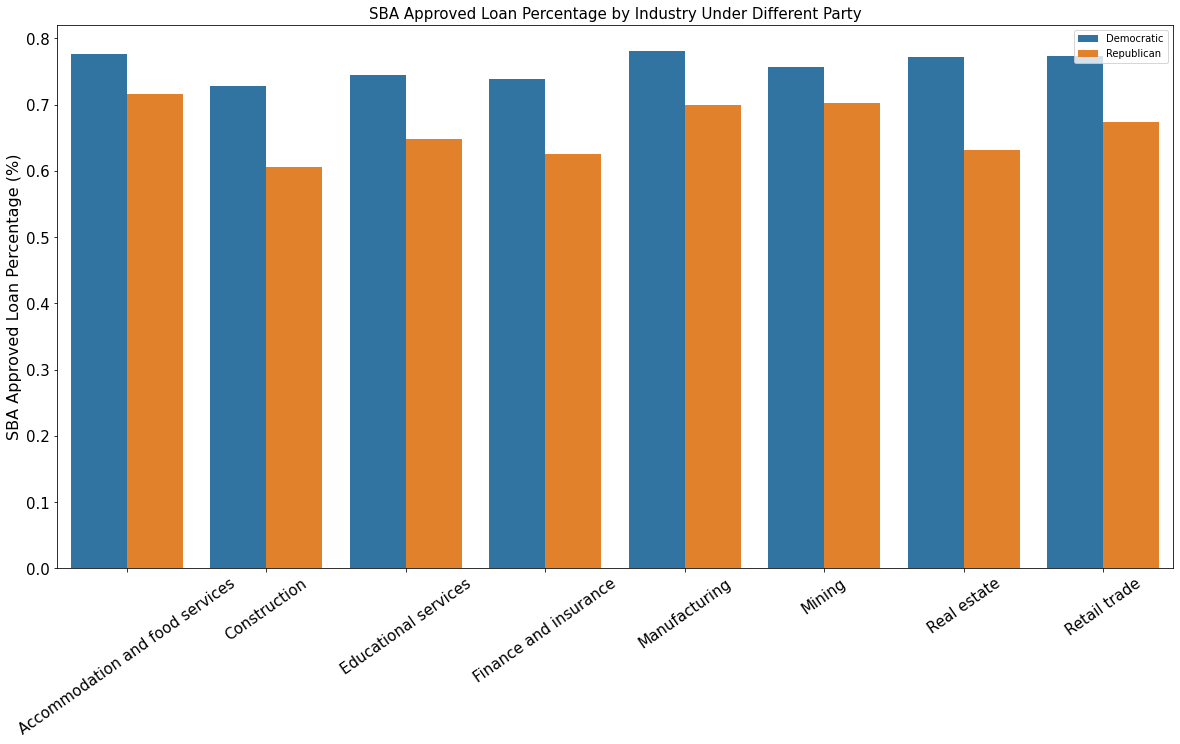

In [77]:
plt.figure(figsize=(20,10))
plt.title('SBA Approved Loan Percentage by Industry Under Different Party',fontsize = 15)
y = df_groupby_industry_and_party['SBA_backed_portion']['mean']
ax3 = sns.barplot(x = 'Industry',y = y,data = df_groupby_industry_and_party, hue = 'President Party')
plt.xlabel('', fontsize=15)
plt.ylabel('SBA Approved Loan Percentage (%)', fontsize=16)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
ax3.legend()
plt.xticks(rotation = 35)
plt.show()


Text(0, 0.5, 'SBA Backed Loan Percentage (%)')

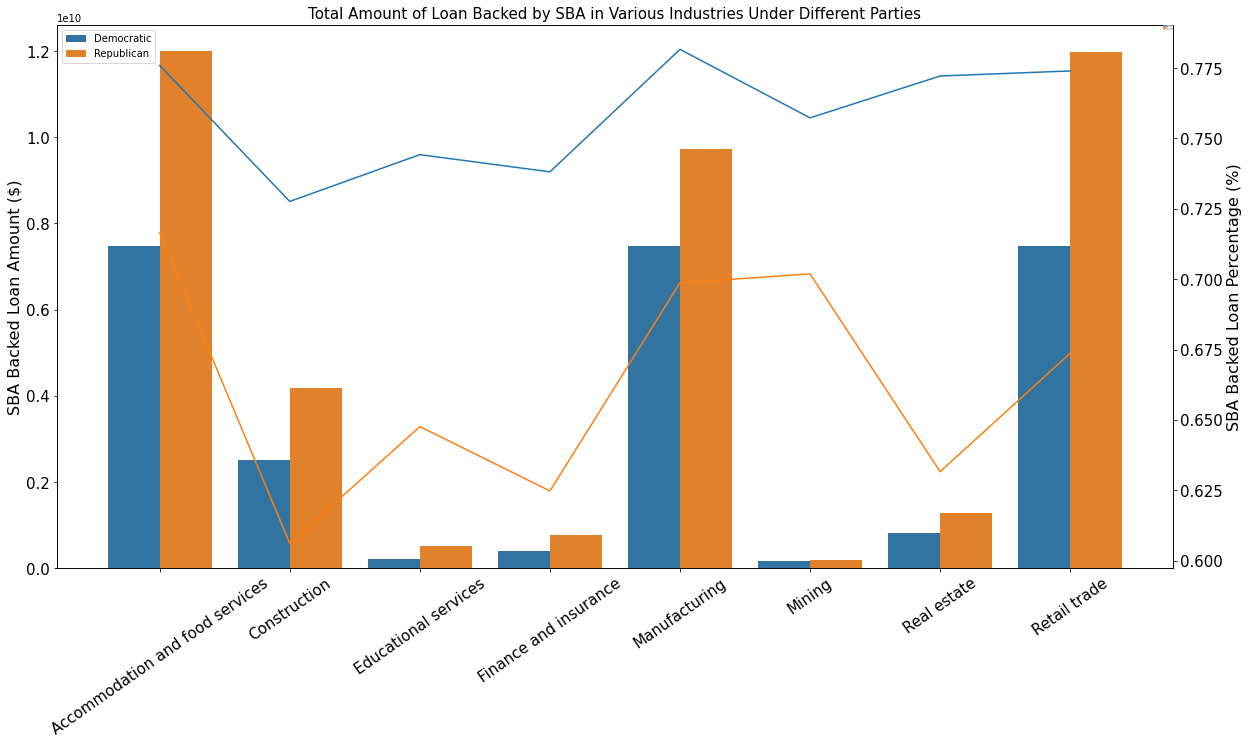

In [107]:
plt.figure(figsize=(20,10))
plt.title('Total Amount of Loan Backed by SBA in Various Industries Under Different Parties', fontsize = 15)
y = df_groupby_industry_and_party['SBA_Appv']['sum']
ax3 = sns.barplot(x = 'Industry',y = y,data = df_groupby_industry_and_party, hue = 'President Party')
plt.xlabel('', fontsize=15)
plt.ylabel('SBA Backed Loan Amount ($)', fontsize=16)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
ax3.legend()
plt.xticks(rotation = 35)

y2 = df_groupby_industry_and_party['SBA_backed_portion']['mean']
ax3 = plt.twinx()
sns.lineplot(data=df_groupby_industry_and_party, x = 'Industry', y = y2, color="r", ax=ax3 ,hue = 'President Party')
plt.yticks(fontsize= 15)
ax3.legend(fontsize= 0)
plt.ylabel('SBA Backed Loan Percentage (%)', fontsize=16)

Question 2. To what extent do unemployment affect SBA backed loan percentage?

In [136]:
#Step 1. Analyze annual Unemployment data in US
unemployment_df = pd.read_csv('Unemployment.csv')
unemployment_df['year'] = unemployment_df['DATE'].astype(str).str[0:4]
Annual_unemployment_rate = unemployment_df.groupby('year').agg({'UNRATE': ['mean']})['UNRATE'].reset_index() #Aggregate into annual unemployment data
Annual_unemployment_rate['year'] = Annual_unemployment_rate['year'].astype(float)

In [137]:
Annual_unemployment_rate

,year,mean
0,1948.0,3.750000
1,1949.0,6.050000
2,1950.0,5.208333
3,1951.0,3.283333
4,1952.0,3.025000
...,...,...
70,2018.0,3.891667
71,2019.0,3.675000
72,2020.0,8.091667
73,2021.0,5.358333


In [138]:
print(Annual_unemployment_rate.info())

new_df['ApprovalFY'] = new_df['ApprovalFY'].astype(float)
print(new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    75 non-null     float64
 1   mean    75 non-null     float64
dtypes: float64(2)
memory usage: 1.3 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 799546 entries, 0 to 799545
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               799546 non-null  object 
 1   Term                799546 non-null  int64  
 2   NoEmp               799546 non-null  int64  
 3   NewExist            799410 non-null  float64
 4   CreateJob           799546 non-null  int64  
 5   RetainedJob         799546 non-null  int64  
 6   FranchiseCode       799546 non-null  int64  
 7   UrbanRural          799546 non-null  int64  
 8   RevLineCr           796084 non-null  object 
 9   GrAppv              799546 non-null  fl

<ipython-input-138-e2ca50212ac9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['ApprovalFY'] = new_df['ApprovalFY'].astype(float)


In [139]:
Annual_unemployment_rate

,year,mean
0,1948.0,3.750000
1,1949.0,6.050000
2,1950.0,5.208333
3,1951.0,3.283333
4,1952.0,3.025000
...,...,...
70,2018.0,3.891667
71,2019.0,3.675000
72,2020.0,8.091667
73,2021.0,5.358333


In [150]:
#Step 2 merge the unemployment data to df
merged_with_unemployment = new_df.merge(Annual_unemployment_rate, how='left', left_on = 'ApprovalFY', right_on = 'year')
merged_with_unemployment = merged_with_unemployment.drop(['year','Republican'], axis=1)
merged_with_unemployment['ApprovalFY'] = merged_with_unemployment['ApprovalFY'].astype(int)
merged_with_unemployment = merged_with_unemployment.rename({'mean':'Unemployment'}, axis='columns')

In [151]:
merged_with_unemployment

,State,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,GrAppv,SBA_Appv,Industry,President Party,ApprovalFY,SBA_backed_portion,Unemployment
0,IN,84,4,2.0,0,0,1,0,N,60000.0,48000.0,Retail trade,Democratic,1997,0.80,4.941667
1,IN,60,2,2.0,0,0,1,0,N,40000.0,32000.0,Accommodation and food services,Democratic,1997,0.80,4.941667
2,IN,180,7,1.0,0,0,1,0,N,287000.0,215250.0,Health care and social assistance,Democratic,1997,0.75,4.941667
3,CT,120,19,1.0,0,0,1,0,N,517000.0,387750.0,Manufacturing,Democratic,1997,0.75,4.941667
4,FL,84,1,2.0,0,0,1,0,N,45000.0,36000.0,Other services (except public administration),Democratic,1997,0.80,4.941667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799541,NC,60,4,1.0,0,0,1,0,T,20000.0,10000.0,Retail trade,Democratic,1997,0.50,4.941667
799542,MN,120,25,1.0,0,0,1,0,0,100000.0,80000.0,Accommodation and food services,Democratic,1997,0.80,4.941667
799543,NY,119,5,1.0,0,0,1,0,0,142000.0,106500.0,Retail trade,Democratic,1997,0.75,4.941667
799544,TX,84,5,2.0,0,0,1,0,N,79000.0,63200.0,Other services (except public administration),Democratic,1997,0.80,4.941667


In [167]:
grouped_by_year = merged_with_unemployment.groupby(['ApprovalFY']).agg('mean').reset_index()
grouped_by_year = grouped_by_year[['SBA_backed_portion','ApprovalFY','Unemployment']]
grouped_by_year['SBA_backed_portion'] = grouped_by_year['SBA_backed_portion']*100



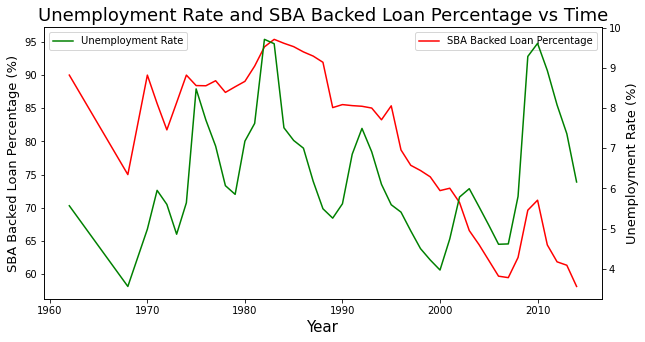

In [190]:
plt.figure(figsize=(10,5))
plt.title('Unemployment Rate and SBA Backed Loan Percentage vs Time',fontsize=18)

ax2 = sns.lineplot(data=grouped_by_year, x = 'ApprovalFY', y = 'SBA_backed_portion',color="r", label = 'SBA Backed Loan Percentage')
ax2.set_ylabel('SBA Backed Loan Percentage (%)',fontsize=13)
ax2.set_xlabel('Year',fontsize=15)
ax2 = plt.twinx()
sns.lineplot(data=grouped_by_year, x = 'ApprovalFY', y = 'Unemployment', color="g", ax=ax2 , label = 'Unemployment Rate')
ax2.set_ylabel('Unemployment Rate (%)',fontsize=13)
plt.show()